# Gradient Boosting

regression

In [93]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [94]:
df = pd.DataFrame()

In [95]:
np.random.seed(42)

In [96]:
X= np.random.rand(100,1)-0.5

In [97]:
X

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

Inorder to get the data as seen in the following scatter plot we used this equation

In [98]:
y= 3*X[:,0]**2 + 0.05 * np.random.randn(100)

In [99]:
df['X']=X.reshape(100)
df['y']=y


In [100]:
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


Plotting the scatter plot

Text(0.5, 1.0, 'X v/s y')

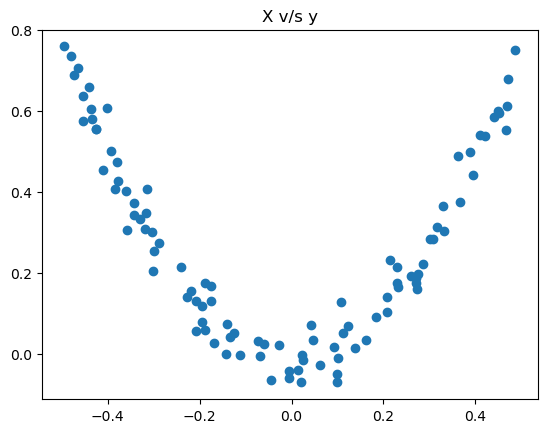

In [101]:
plt.scatter(df['X'],df['y'])
plt.title('X v/s y')

In [102]:
df['pred1[base model]'] = df['y'].mean()

In [103]:
df

,X,y,pred1[base model]
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


Calculating the residual1

In [104]:
df['Res1'] = df['y']- df['pred1[base model]']

In [105]:
df

,X,y,pred1[base model],Res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


Training the model on Res1 

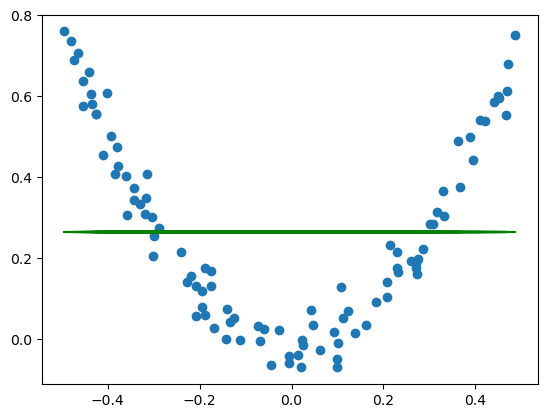

In [106]:
plt.scatter(df['X'],df['y'])
plt.plot(df["X"], df["pred1[base model]"], color="green")


The line representing the base model 

In [80]:
df['X'].values.reshape(100,1) 

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [81]:
y1 = df['Res1']

In [82]:
from sklearn.tree import DecisionTreeRegressor

In [83]:
DT1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [84]:
DT1.fit(X,y1)

DecisionTreeRegressor(max_leaf_nodes=8)

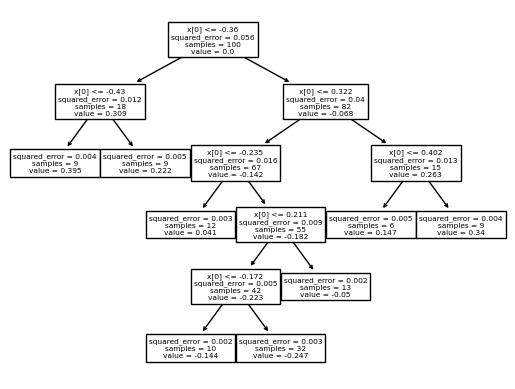

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

In [85]:
from sklearn.tree import plot_tree
plot_tree(DT1)
plt.show()
plt.figure(figsize=(18,6))

In [107]:
DT1.predict(X)

array([-0.24713887,  0.34042552, -0.04967441, -0.24713887,  0.04050621,
        0.04050621,  0.39545394,  0.14713689, -0.24713887, -0.24713887,
        0.39545394,  0.34042552,  0.14713689,  0.04050621,  0.04050621,
        0.04050621, -0.14386455, -0.24713887, -0.24713887, -0.14386455,
       -0.24713887,  0.22233842, -0.14386455, -0.24713887, -0.24713887,
       -0.04967441,  0.04050621, -0.24713887, -0.24713887,  0.39545394,
       -0.24713887,  0.04050621,  0.39545394,  0.34042552,  0.34042552,
       -0.04967441, -0.14386455,  0.22233842, -0.24713887, -0.24713887,
        0.22233842, -0.24713887,  0.39545394,  0.34042552,  0.04050621,
       -0.24713887, -0.14386455, -0.24713887, -0.24713887,  0.04050621,
        0.34042552, -0.04967441,  0.34042552,  0.14713689, -0.24713887,
        0.34042552,  0.22233842,  0.04050621,  0.39545394, -0.14386455,
       -0.24713887, -0.14386455,  0.14713689, -0.24713887, -0.14386455,
       -0.24713887,  0.04050621, -0.04967441,  0.22233842,  0.34

In [108]:
df['pred2']= DT1.predict(X)

In [109]:
df

,X,y,pred1[base model],Res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,-0.247139
1,0.450714,0.594480,0.265458,0.329021,0.340426
2,0.231994,0.166052,0.265458,-0.099407,-0.049674
3,0.098658,-0.070178,0.265458,-0.335636,-0.247139
4,-0.343981,0.343986,0.265458,0.078528,0.040506
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.247139
96,0.022733,-0.002305,0.265458,-0.267763,-0.247139
97,-0.072459,0.032809,0.265458,-0.232650,-0.247139
98,-0.474581,0.689516,0.265458,0.424057,0.395454


Res2 can also be found out without the learning rate alpha , but it will be a overfitted model 


Res2 = base(pred1) + alpha * pred2

Let alpha = 0.1  ---> learning rate 

In [110]:
alpha = 0.1

In [111]:
df['Res2'] = (df['y']) - ( (df['pred1[base model]'] ) + (alpha *  df['pred2']) )

In [112]:
df

,X,y,pred1[base model],Res1,pred2,Res2
0,-0.125460,0.051573,0.265458,-0.213885,-0.247139,-0.189172
1,0.450714,0.594480,0.265458,0.329021,0.340426,0.294979
2,0.231994,0.166052,0.265458,-0.099407,-0.049674,-0.094439
3,0.098658,-0.070178,0.265458,-0.335636,-0.247139,-0.310922
4,-0.343981,0.343986,0.265458,0.078528,0.040506,0.074477
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.247139,-0.281420
96,0.022733,-0.002305,0.265458,-0.267763,-0.247139,-0.243049
97,-0.072459,0.032809,0.265458,-0.232650,-0.247139,-0.207936
98,-0.474581,0.689516,0.265458,0.424057,0.395454,0.384512


Res1> Res2

In [125]:
X_test = np.linspace(-0.5,0.5,500)

In [130]:
BASE = df["pred1[base model]"]

Without alpha 

In [133]:
y_pred = BASE[0] +   DT1.predict(X_test.reshape(500,1))

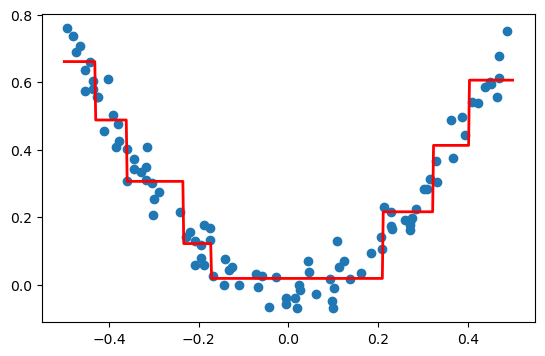

In [134]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test ,y_pred,linewidth =2,color='red')
plt.scatter(df['X'],df['y'])

Here , blue represents the actual data where red represents the curve between x_test and y_pred

Representing overfitting

So we are goin to train the additive model on the data 

With alpha 

In [131]:
y_pred_a = BASE[0] + (alpha *  DT1.predict(X_test.reshape(500,1))) 

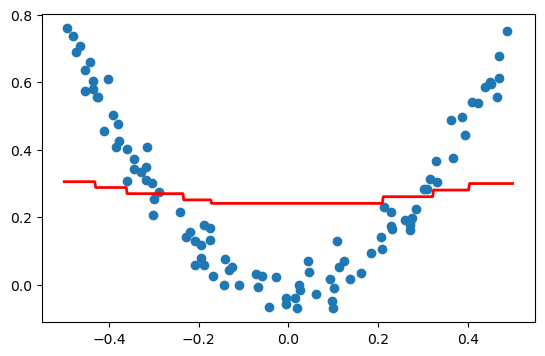

In [132]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test ,y_pred_a,linewidth =2,color='red')
plt.scatter(df['X'],df['y'])

Model 2 : DT2 

In [113]:
DT2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [114]:
DT2.fit(X,df['Res2'])

DecisionTreeRegressor(max_leaf_nodes=8)

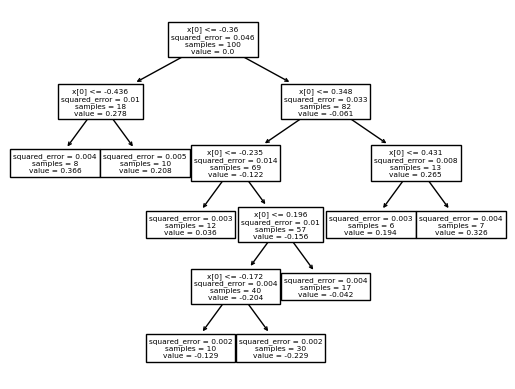

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

In [117]:
from sklearn.tree import plot_tree
plot_tree(DT2)
plt.show()
plt.figure(figsize=(18,6))

In [115]:
DT2.predict(X)

array([-0.22939332,  0.32555151, -0.04161102, -0.22939332,  0.03645559,
        0.03645559,  0.36597035,  0.19392037, -0.22939332, -0.04161102,
        0.36597035,  0.32555151, -0.04161102,  0.03645559,  0.03645559,
        0.03645559, -0.1294781 , -0.22939332, -0.22939332, -0.1294781 ,
       -0.22939332,  0.20763553, -0.1294781 , -0.22939332, -0.22939332,
       -0.04161102,  0.03645559, -0.22939332, -0.22939332,  0.36597035,
       -0.22939332,  0.03645559,  0.20763553,  0.32555151,  0.32555151,
       -0.04161102, -0.1294781 ,  0.20763553, -0.22939332, -0.22939332,
        0.20763553, -0.22939332,  0.36597035,  0.19392037,  0.03645559,
       -0.22939332, -0.1294781 , -0.22939332, -0.22939332,  0.03645559,
        0.32555151, -0.04161102,  0.32555151,  0.19392037, -0.22939332,
        0.19392037,  0.20763553,  0.03645559,  0.36597035, -0.1294781 ,
       -0.22939332, -0.1294781 , -0.04161102, -0.22939332, -0.1294781 ,
       -0.22939332,  0.03645559, -0.04161102,  0.20763553,  0.32

In [116]:
df['pred3'] = DT2.predict(X)

Res2 = base(pred1) + alpha * pred2 + alpha * pred3

In [118]:
df['Res3'] = (df['y']) - ( (df['pred1[base model]'] ) + (alpha *  df['pred2']) + (alpha *  df['pred3']) ) 

In [119]:
df

,X,y,pred1[base model],Res1,pred2,Res2,pred3,Res3
0,-0.125460,0.051573,0.265458,-0.213885,-0.247139,-0.189172,-0.229393,-0.166232
1,0.450714,0.594480,0.265458,0.329021,0.340426,0.294979,0.325552,0.262424
2,0.231994,0.166052,0.265458,-0.099407,-0.049674,-0.094439,-0.041611,-0.090278
3,0.098658,-0.070178,0.265458,-0.335636,-0.247139,-0.310922,-0.229393,-0.287983
4,-0.343981,0.343986,0.265458,0.078528,0.040506,0.074477,0.036456,0.070831
...,...,...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.247139,-0.281420,-0.229393,-0.258480
96,0.022733,-0.002305,0.265458,-0.267763,-0.247139,-0.243049,-0.229393,-0.220110
97,-0.072459,0.032809,0.265458,-0.232650,-0.247139,-0.207936,-0.229393,-0.184997
98,-0.474581,0.689516,0.265458,0.424057,0.395454,0.384512,0.365970,0.347915


Res3< Res 2 < Res 1


# Direct Implelementation using Sklearn

In [135]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [136]:
# Assuming 'X' is your feature matrix and 'y' is your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [142]:
# Assuming 'X' is your feature matrix and 'y' is your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, max_leaf_nodes=8, random_state=42)


In [143]:
# Train the model
gb_regressor.fit(X_train, y_train)


GradientBoostingRegressor(max_leaf_nodes=8, random_state=42)

In [144]:
# Make predictions on the test set
predictions = gb_regressor.predict(X_test)



In [145]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0022669371459863356


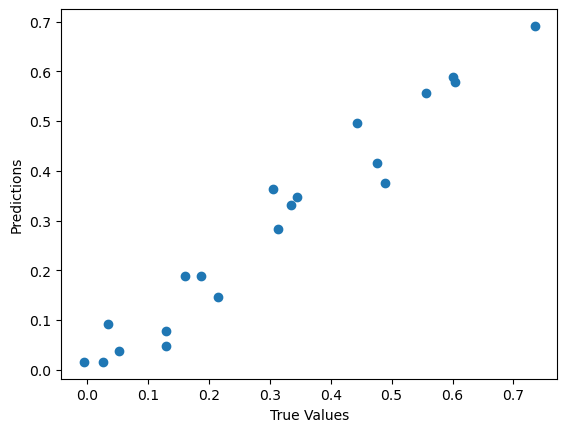

In [146]:

# Plot the true values vs. predicted values
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()